## Q1: Convert covariance matrix into correlation matrix using numpy

### A) Explain Covariance and Correlation
Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship.\
You may use equations for clarification.

**Answer:**\
Covariance is the joint variability of two random variables
$$
cov(x,y) = \sigma_{x,y} = \frac{\sum_{}^{}(x_i-\overline{x})(y_i-\overline{y})}{n-1}
$$
Correlation on the other hand, refers to the relation between 2 random variables, and measures how they change together.\
Usually a correlation coefficient ranges from [-1, 1].
$$
corr(x,y) = \rho_{x,y} = \frac{\sigma_{x,y}}{\sigma_{x}\sigma_{y}}
$$

Correlation is a normalized version of covariance, as it is defined by the division of the covariance by the product of the variables' SD (σ).

### B) Visualize and explore dataset

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
iris_df = sns.load_dataset("iris")
display(iris_df.head())
display(iris_df.tail())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [61]:
print('\nDataset info:\n')
print(iris_df.info())

print('\nDataset description:')
display(iris_df.describe())


Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Dataset description:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Check if dataset is balanced

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


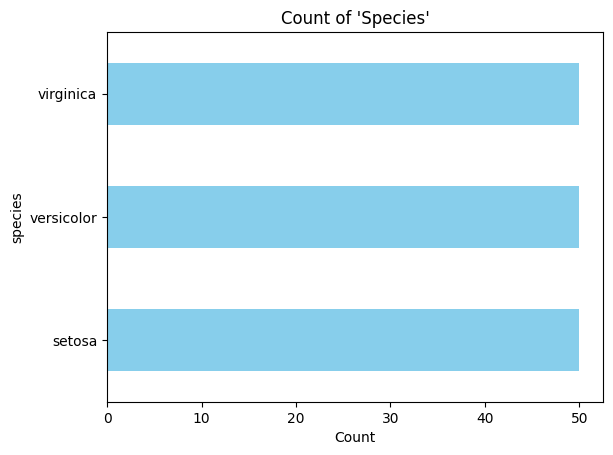

In [82]:
counts = iris_df.species.value_counts()
print(counts)
counts.plot(kind='barh', color='skyblue', title="Count of 'Species'")
plt.xlabel('Count')
plt.show()

Visualize distribution of features for each species and detect outliers

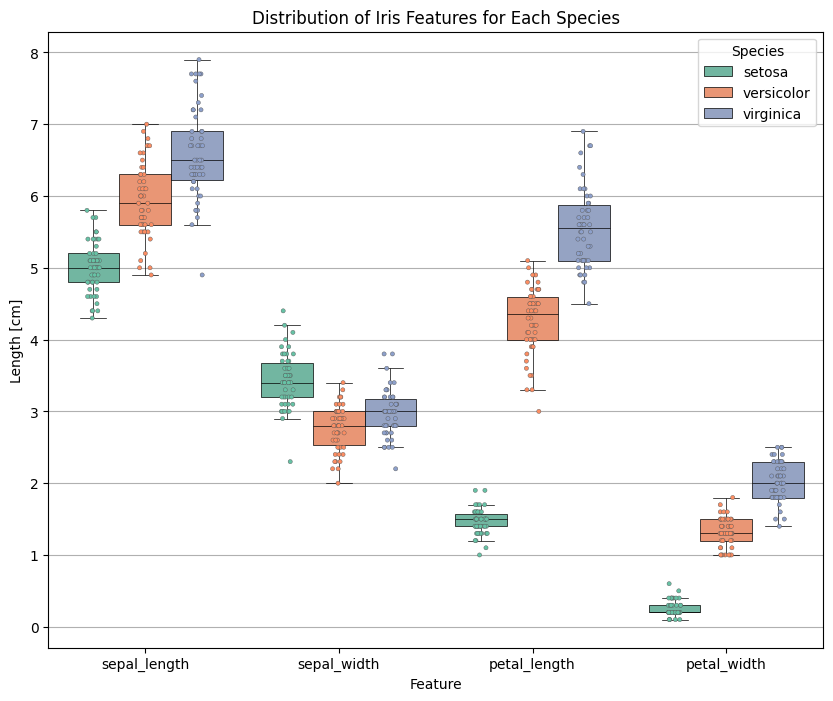

In [83]:
df_long = iris_df.melt(id_vars='species', 
                       var_name='feature',
                       value_name='value')
#display(df_long)

# Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_long, x='feature', y='value', hue='species',
            palette='Set2', linecolor='black', linewidth=0.5, fliersize=0)
sns.stripplot(data=df_long, x='feature', y='value', hue='species',
              palette='Set2', linewidth=0.3, dodge=True, size=3, legend=False)

plt.title("Distribution of Iris Features for Each Species")
plt.xlabel("Feature")
plt.ylabel("Length [cm]")
plt.grid(axis='y')
plt.legend(title="Species")
plt.show()


### C) Implement covariance functions

In [64]:
def calcCov(x, y):
    '''calculate the covariance between two variables'''
    if len(x) != len(y):
        return ValueError("x and y have different length")
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sum = 0
    for (x_val, y_val) in zip(x,y):
        sum += (x_val - x_mean) * (y_val - y_mean)
    cov = sum / (n-1)
    return cov


def covMat(data):
    '''Return NxN covariance matrix of a dataset, where N is the number of features'''
    # Select only numerical columns
    numerical_data = data.select_dtypes(include=[np.number])
    n_features = len(numerical_data.columns)
    cov_mat = np.zeros((n_features, n_features))
    
    for i, (f1, s1) in enumerate(numerical_data.items()):
        for j, (f2, s2) in enumerate(numerical_data.items()):
            cov_mat[i, j] = calcCov(s1, s2)
    return cov_mat

# Small test for 'calcCov'
x = [0,4,7]
y = [1,2,3]
print("Small test for 'calcCov:'")
print("'calcCov' result:\n", calcCov(x,y))
print("\n'np.cov' matrix:\n", np.cov(x,y))

Small test for 'calcCov:'
'calcCov' result:
 3.5

'np.cov' matrix:
 [[12.33333333  3.5       ]
 [ 3.5         1.        ]]


### D) Test 1: Numpy's np.cov(data, rowvar=False) compared to covMat(data)

Numpy's np.cov result:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]

My result:


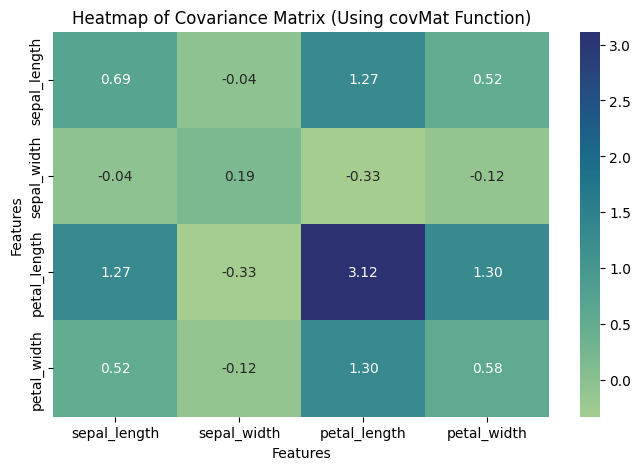

In [65]:
# Apply only on numerical columns
numeric_features = iris_df.select_dtypes(include=[np.number])
np_cov_mat = np.cov(numeric_features, rowvar=False)
print("Numpy's np.cov result:\n", np_cov_mat)

my_cov_mat = covMat(iris_df)
print("\nMy result:")
plt.figure(figsize=(8, 5))
labels = ['sepal_length', 'sepal_width'	, 'petal_length', 'petal_width']
sns.heatmap(my_cov_mat, annot=True, fmt=".2f" , xticklabels=labels, yticklabels=labels, cmap='crest')
plt.title("Heatmap of Covariance Matrix (Using covMat Function)")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### E) Implement correlation matrix (using covMat)

In [84]:
def corrMat(data):
    '''Computes correlation matrix of a given dataset'''
    # Adjust data for calculations
    numerical_data = data.select_dtypes(include=[np.number])
    n_features = len(numerical_data.columns)
    
    # Compute std for each feature
    std_df = numerical_data.std()

    # Compute covariance matrix
    cov_mat = covMat(data)
    corr_mat = np.zeros_like(cov_mat)
    
    # Normalize the covariance matrix using the stds of the features
    for i in range(n_features):
        for j in range(n_features):
            std_i = std_df.iloc[i]
            std_j = std_df.iloc[j]
            corr_mat[i, j] = cov_mat[i, j] / ( std_i * std_j)
    
    return corr_mat

### F) Test2: NumPy's np.corrcoef(data,rowvar=False) compared to corrMat(data)

Numpy's np.corrcoef result:
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

My result:


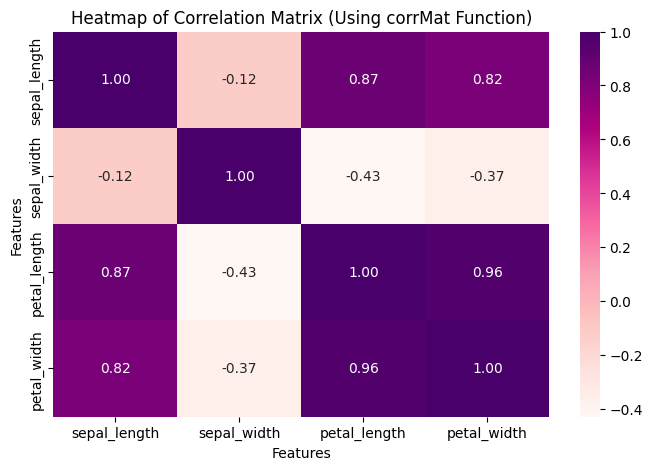

In [85]:
# Apply only on numerical columns
numeric_features = iris_df.select_dtypes(include=[np.number])
np_corr_mat = np.corrcoef(numeric_features, rowvar=False)
print("Numpy's np.corrcoef result:\n", np_corr_mat)

my_corr_mat = corrMat(iris_df)
print("\nMy result:")
plt.figure(figsize=(8, 5))
labels = ['sepal_length', 'sepal_width'	, 'petal_length', 'petal_width']
sns.heatmap(my_corr_mat, annot=True, fmt=".2f" , xticklabels=labels, yticklabels=labels, cmap='RdPu')
plt.title("Heatmap of Correlation Matrix (Using corrMat Function)")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### G) Communicate tests results using visualizations

In [68]:
# Test Similarity between Numpy's results and mine
def plot_similarity(mat1, mat2, measure_name, func_name, my_func_name):
    labels = ['sepal_length', 'sepal_width'	, 'petal_length', 'petal_width']
    similarity = np.round((mat1 - mat2), decimals=10)

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.delaxes(axes[1, 1])

    # Heatmap of mat1
    sns.heatmap(mat1, annot=True, fmt=".2f", cmap='crest', ax=axes[0, 0])
    axes[0, 0].set_xticklabels(labels, rotation=45)
    axes[0, 0].set_yticklabels(labels, rotation=45)
    axes[0, 0].set_xlabel('Features')
    axes[0, 0].set_ylabel('Features')
    axes[0, 0].set_title(f"{measure_name} Matrix (Using {func_name} Function)")

    # Heatmap of mat2
    sns.heatmap(mat2, annot=True, fmt=".2f", cmap='RdPu', ax=axes[0, 1])
    axes[0, 1].set_xticklabels(labels, rotation=45)
    axes[0, 1].set_yticklabels(labels, rotation=45)
    axes[0, 1].set_xlabel('Features')
    axes[0, 1].set_ylabel('Features')
    axes[0, 1].set_title(f"{measure_name} Matrix (Using {my_func_name} Function)")

    # Heatmap of similarity
    sns.heatmap(similarity, annot=True, fmt=".2f" , xticklabels=labels, yticklabels=labels, cmap='coolwarm', ax=axes[1, 0])
    axes[1, 0].set_xticklabels(labels, rotation=45)
    axes[1, 0].set_yticklabels(labels, rotation=45)
    axes[1, 0].set_xlabel('Features')
    axes[1, 0].set_ylabel('Features')
    axes[1, 0].set_title(f"Difference Between {func_name} and {my_func_name} \n(Similarity Matrix)")
    
    plt.suptitle(f'Visualize Test Results: {measure_name}')
    plt.tight_layout()
    plt.show()

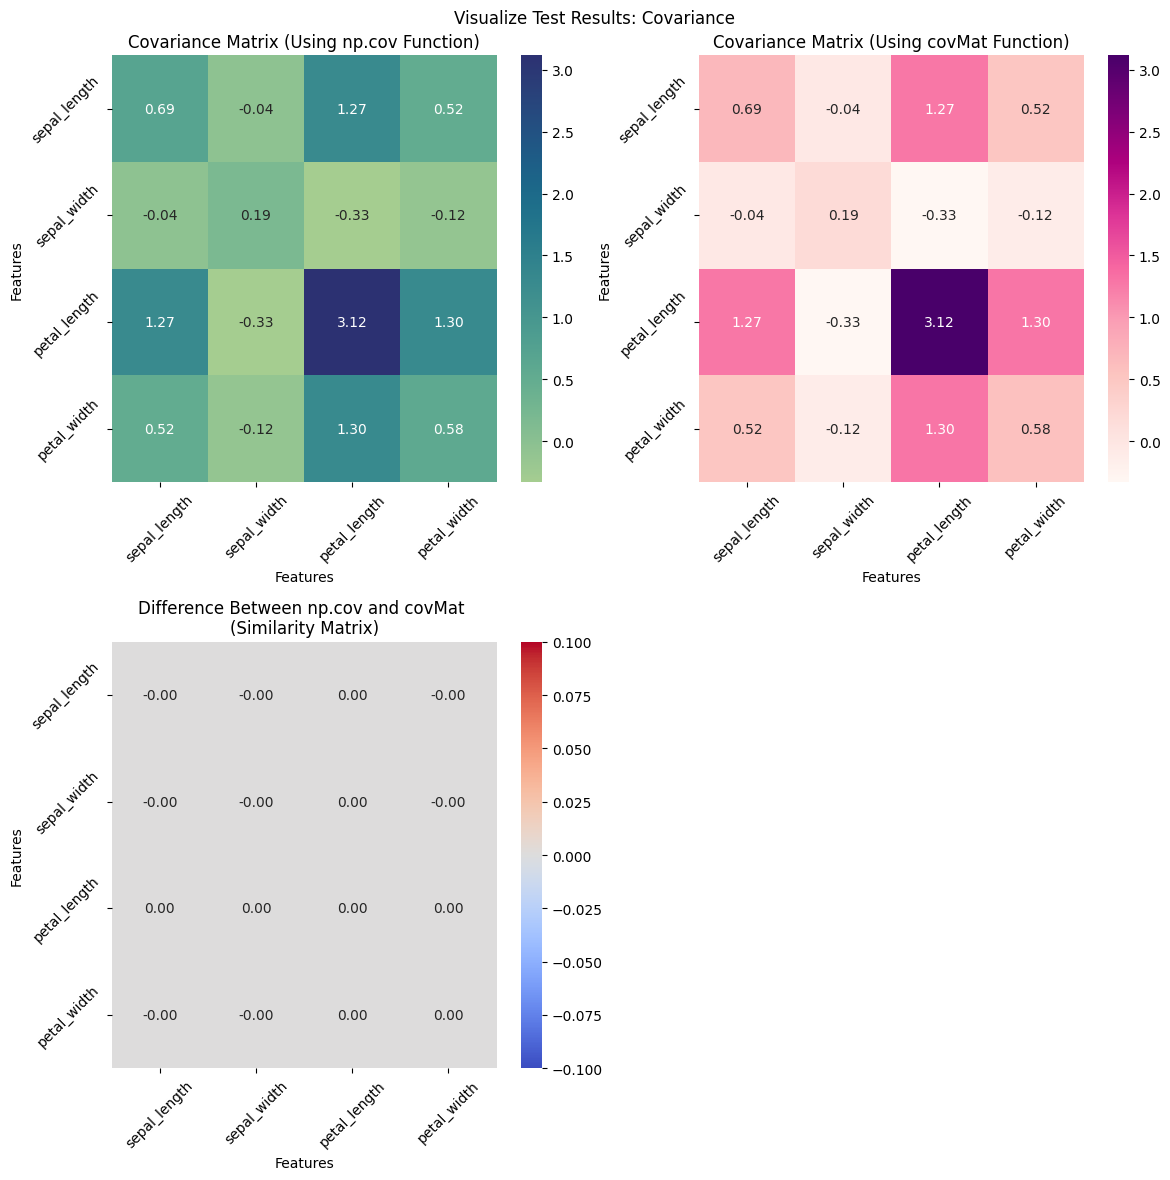

In [69]:
plot_similarity(my_cov_mat, np_cov_mat, 'Covariance', 'np.cov', 'covMat')

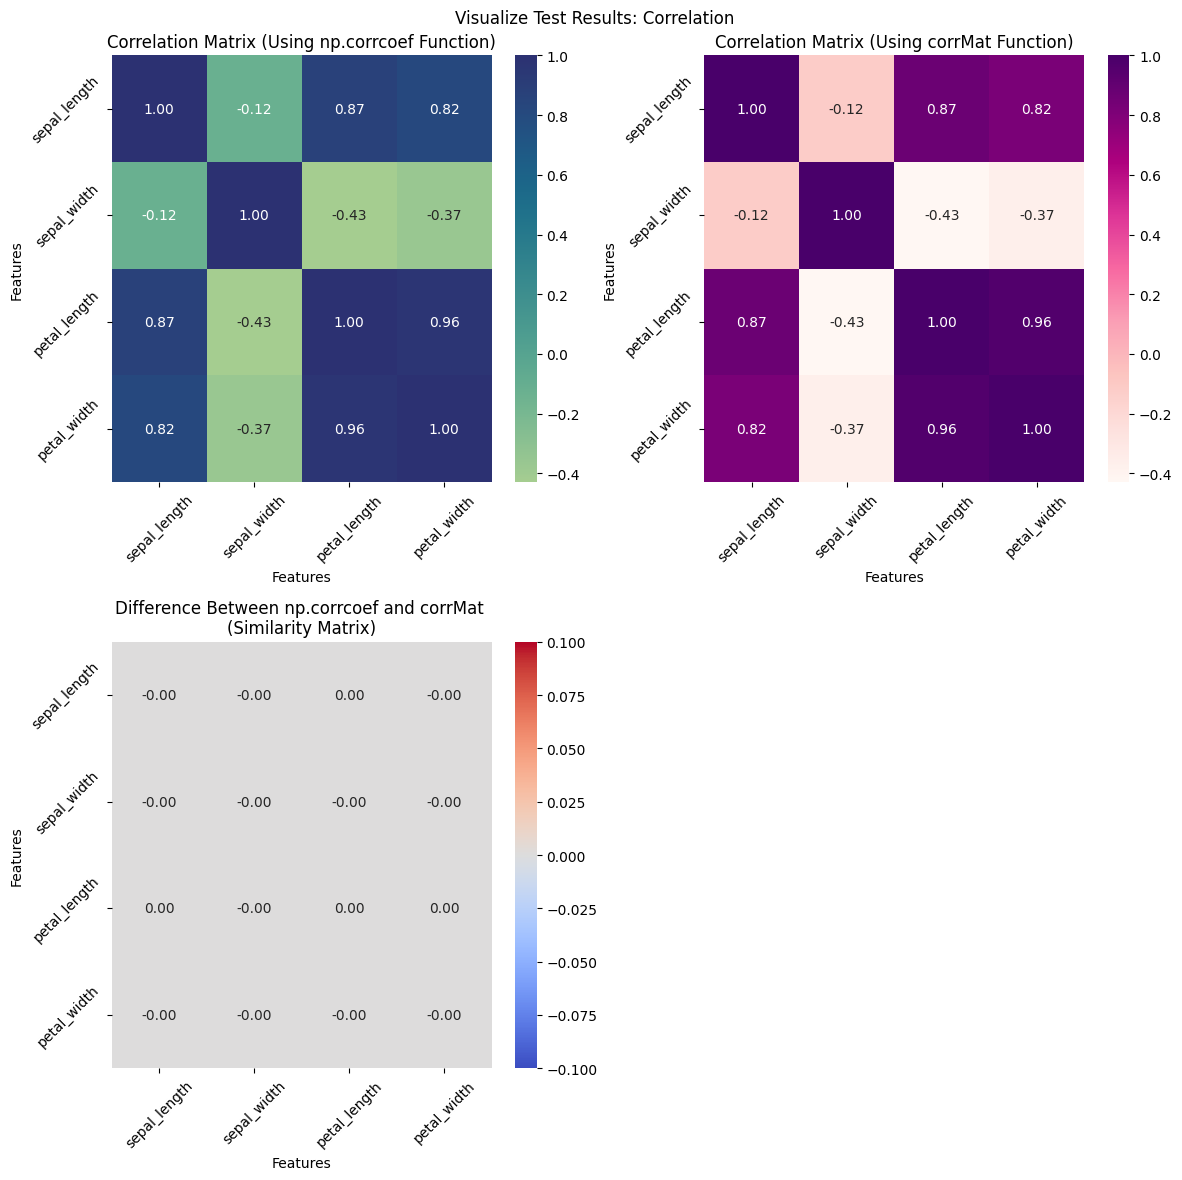

In [70]:
plot_similarity(my_corr_mat, np_corr_mat, 'Correlation', 'np.corrcoef', 'corrMat')

## Q2: NumPy, Pandas, MatPlotLib/Seaborn/Plotly

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### 1) Load and explore dataset

In [72]:
laptop_prices=pd.read_csv('laptop_price - dataset.csv')
display(laptop_prices.head())

print('\nDataset info:\n')
print(laptop_prices.info())

print('\nDataset description:')
display(laptop_prices.describe())

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60



Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


### 2) Plot the price of all the laptops

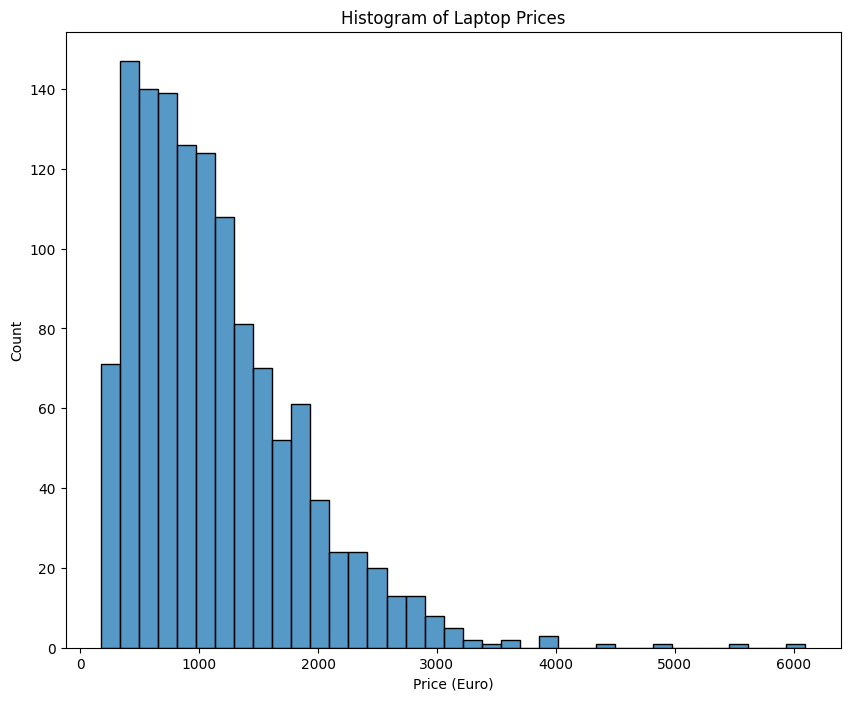

In [88]:
plt.figure(figsize=(10, 8))
sns.histplot(laptop_prices['Price (Euro)'])
plt.title('Histogram of Laptop Prices')
plt.show()

### 3) Which company has on average the most expensive laptop? What is the average laptop price for each company?

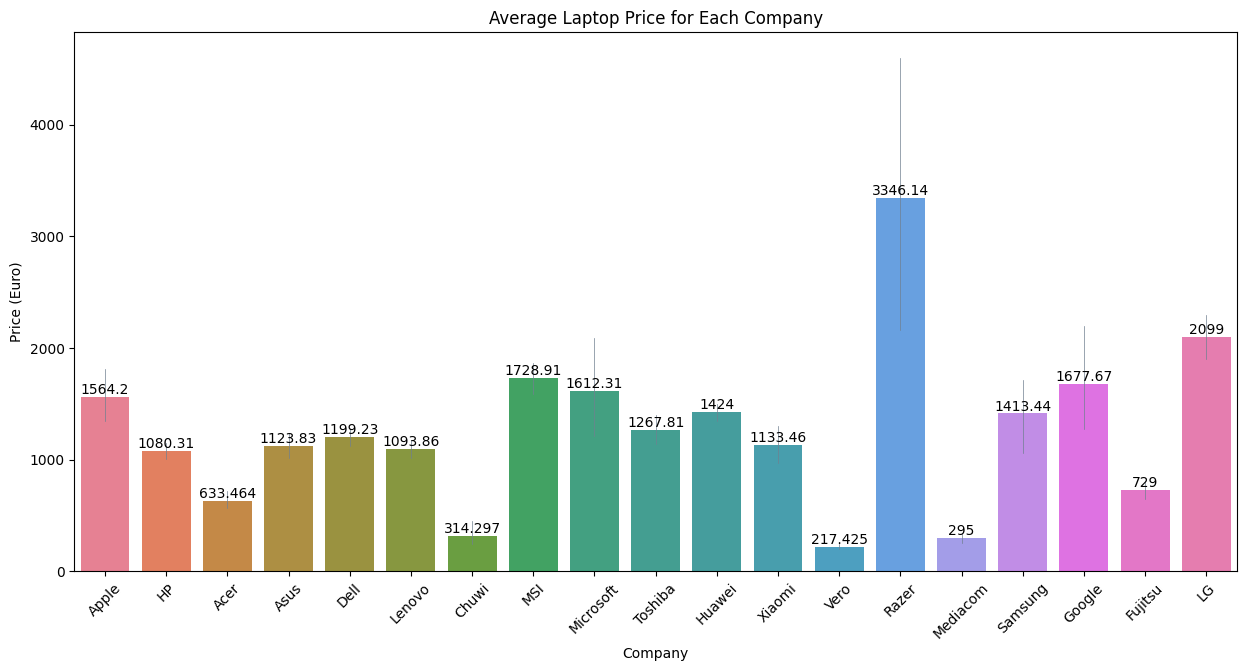

In [89]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(laptop_prices, x='Company', y='Price (Euro)', hue='Company', err_kws={'linewidth': 0.5, 'color':'slategray'})
plt.xticks(laptop_prices.Company.unique(), rotation=45)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Average Laptop Price for Each Company')
plt.show()

**Answer:**\
From the figure we can see that on average 'Razer' company sells the most expensive laptops.

### 4) Find the different types of Operating systems present in the data - under the column name "OpSys".
Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

In [90]:
print('Operating Systems in data Before fixing:\n', laptop_prices.OpSys.unique())
# Adjust values to be uniform
laptop_prices_fixed = laptop_prices.replace(to_replace='Mac OS X', value='macOS', inplace=False)
laptop_prices_fixed = laptop_prices_fixed.replace(to_replace=['Windows 10', 'Windows 10 S', 'Windows 7'], value='Windows', inplace=False)
print('Operating Systems in data After fixing:\n', laptop_prices_fixed.OpSys.unique()) 

Operating Systems in data Before fixing:
 ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
Operating Systems in data After fixing:
 ['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


**Answer:**
The data contain a total of 7 operating systems:
 - 'macOS'
 - 'No OS'
 - 'Windows'
 - 'Linux'
 - 'Android'
 - 'Chrome OS'

### 5) Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

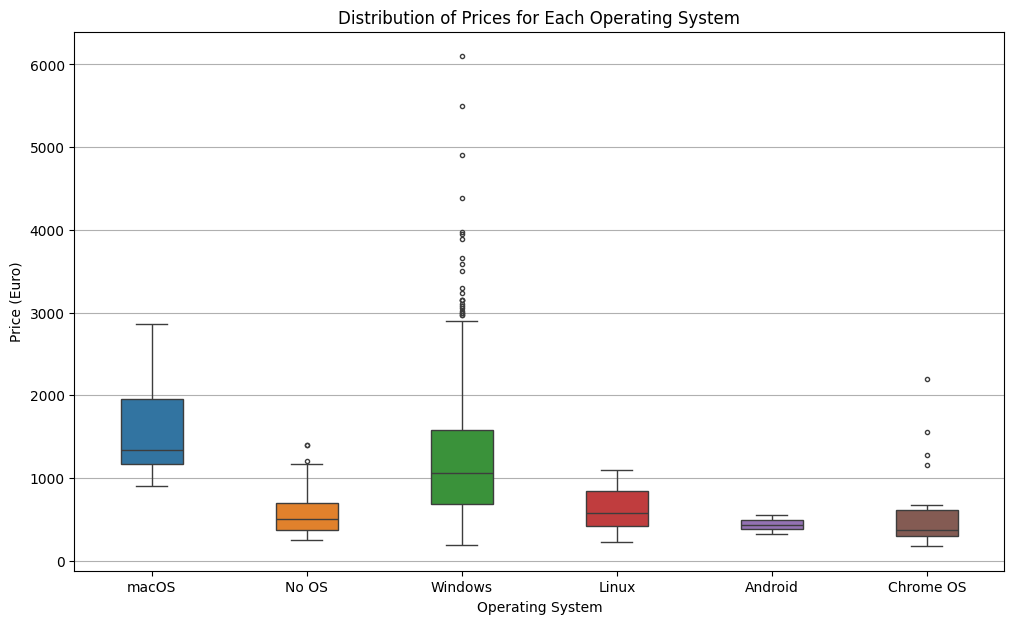

In [76]:
plt.figure(figsize=(12, 7))
sns.boxplot(laptop_prices_fixed, x='OpSys', y='Price (Euro)', hue='OpSys', width=0.4, fliersize=3)
plt.title('Distribution of Prices for Each Operating System')
plt.xlabel('Operating System')
plt.grid(axis='y')
plt.show()

### 6) What is the relationship between RAM and computer price? add an adequate plot to support your findings.

RAM options: [ 8 16  4  2 12  6 32 24 64]
Correlation between RAM (GB) and Price (Euro): 0.7402865271622701


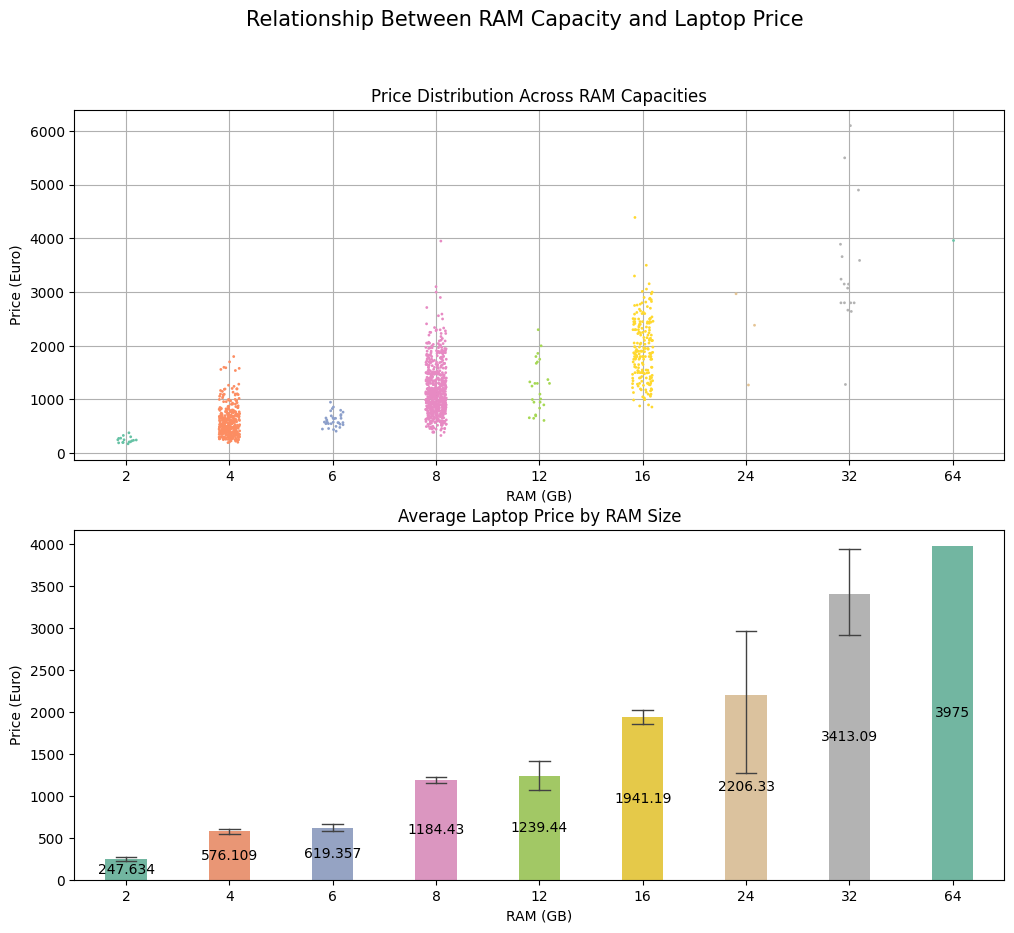

In [92]:
print('RAM options:', laptop_prices_fixed['RAM (GB)'].unique())
correlation = laptop_prices_fixed['RAM (GB)'].corr(laptop_prices_fixed['Price (Euro)'])
print(f"Correlation between RAM (GB) and Price (Euro): {correlation}")

fig, axes = plt.subplots(2, 1, figsize=(12,10))

# sns.boxplot(data=laptop_prices_fixed, x='RAM (GB)', y='Price (Euro)',
#             fill=False, color='slategray', linewidth=1, width=0.4,
#             ax=axes[0], legend=False, fliersize=0)

sns.stripplot(data=laptop_prices_fixed, x='RAM (GB)', y='Price (Euro)',
              hue='RAM (GB)', palette='Set2', size=2, ax=axes[0], legend=False)
axes[0].grid()
axes[0].set_title('Price Distribution Across RAM Capacities')

ax = sns.barplot(data=laptop_prices_fixed, x='RAM (GB)', y='Price (Euro)',
            hue='RAM (GB)', palette='Set2', capsize=0.2, width=0.4,
            err_kws={'linewidth': 1}, ax=axes[1], legend=False)
axes[1].set_title('Average Laptop Price by RAM Size')

# Add labels
for i in ax.containers:
    ax.bar_label(i, label_type='center')


plt.suptitle('Relationship Between RAM Capacity and Laptop Price', fontsize=15)
plt.show()

**Answer:**
- The dataset categorizes laptops into 9 distinct RAM capacities.
- We observe a strong positive correlation of 0.74 between RAM capacity and laptop price, indicating that laptops with higher RAM generally cost more.
- The average laptop price increases consistently with greater RAM capacity.
- Interestingly, certain RAM capacities are more prevalent in the dataset. 4GB, 8GB, and 16GB are the most common configurations, likely reflecting their popularity among consumers.

### 7) Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

In [94]:
import re

print("'Memory' unique values:\n", laptop_prices_fixed.Memory.unique())

def extract_storage_type_regex(storage):
    storage_types = re.findall(r'(SSD|HDD|Flash Storage|Hybrid)', storage)
    return ', '.join(set(storage_types))

# Apply the regex function to the column
laptop_prices_fixed['Storage type'] = laptop_prices_fixed['Memory'].apply(extract_storage_type_regex)
print("\n'Storage type' unique values:\n", laptop_prices_fixed['Storage type'].unique())
display(laptop_prices_fixed.head())

'Memory' unique values:
 ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']

'Storage type' unique values:
 ['SSD' 'Flash Storage' 'HDD' 'SSD, HDD' 'Hybrid' 'HDD, Flash Storage'
 'SSD, Hybrid']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD


## Q3: Additional questions regarding the data
Think of additional questions related to this data.
What types of analyses and visualizations would you use to address them? Select two questions from your list and implement.\
Submit your list of questions, suggested analyses and visualizations and the implementation.

**Answer:**

1. **Is there a relationship between weight and price?**
- *Analysis:* Perform correlation analysis between weight and price to determine the strength and direction of the relationship.  
- *Visualization:* Plot prices as a function of weight, maybe a scatter plot with a regression line to visualize the trend between weight and price.

2. **How many different products does each company offer?**
- *Analysis:* Group by company and count the number of unique products.  
- *Visualization:* A bar chart displaying the number of products offered by each company.

3. **Which CPU type is the most common in the dataset?**
- *Analysis:* Count the occurrences of each CPU type and identify the most frequent one. 
- *Visualization:* A pie chart or bar chart showing the distribution of CPU types.

4. **Do all laptops in the dataset include a GPU?**
- *Analysis:* Check the GPU column for null or missing values and calculate the percentage of laptops with/without GPUs.  
- *Visualization:* A pie chart or stacked bar chart showing the proportion of laptops with GPUs.

5. **Which operating system is most commonly installed on the laptops?**
- *Analysis:* Count the occurrences of each operating system to identify the most common one. 
- *Visualization:* A bar chart displaying the frequency of each operating system.

### Implementation:

##### 1. **Is there a relationship between weight and price?**

Correlation between Weight (kg) and Price (Euro): 0.2118834449220652


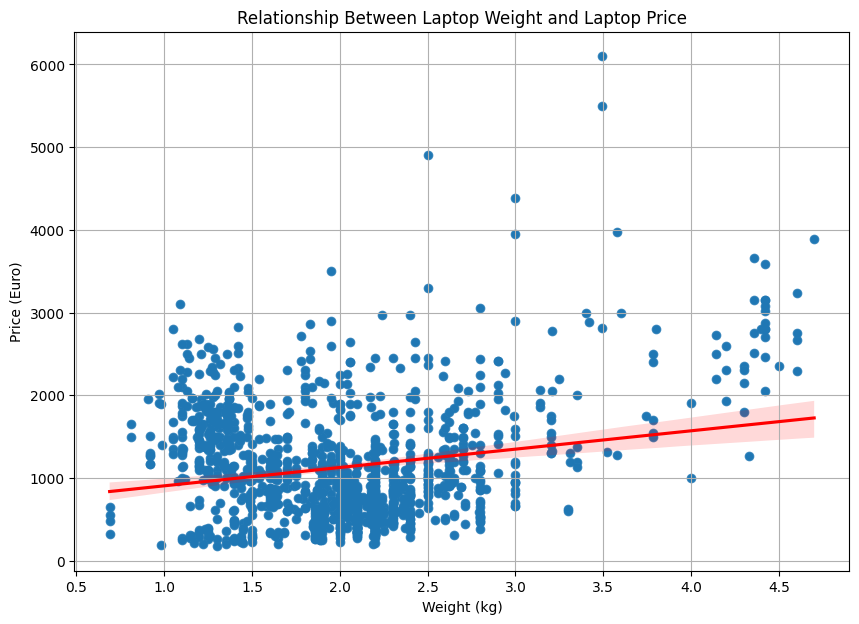

In [95]:
correlation = laptop_prices_fixed['Weight (kg)'].corr(laptop_prices_fixed['Price (Euro)'])
print(f"Correlation between Weight (kg) and Price (Euro): {correlation}")

plt.figure(figsize=(10, 7))
sns.scatterplot(data=laptop_prices_fixed, x='Weight (kg)', y='Price (Euro)')
sns.regplot(data=laptop_prices_fixed, x='Weight (kg)', y='Price (Euro)', line_kws={'color': 'red'})
plt.title("Relationship Between Laptop Weight and Laptop Price")
plt.grid()
plt.show()

**Answer:**

We can see a very low correlation of 0.2 between laptop weight and laptop price.

##### 5. **Which operating system is most commonly installed on the laptops?**

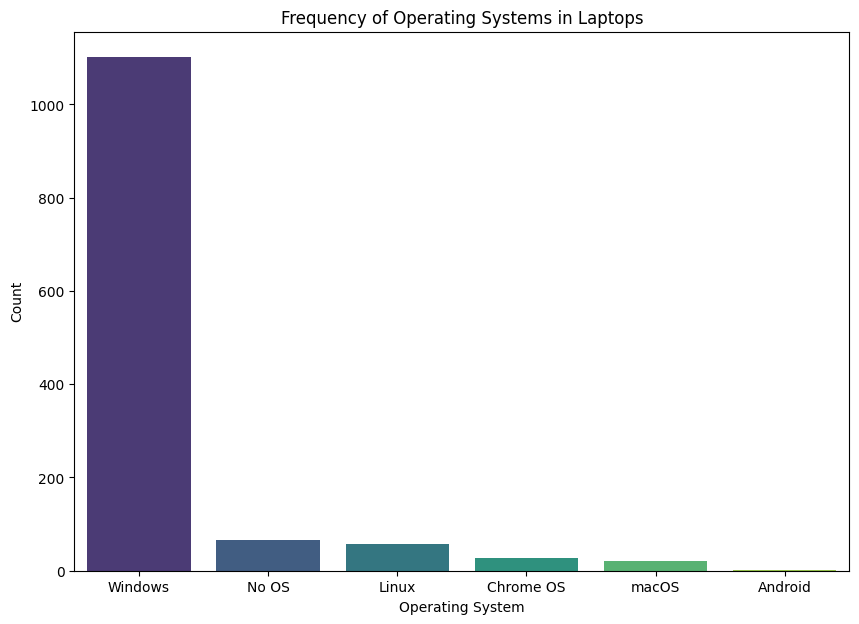

In [96]:
laptop_prices_fixed.OpSys.unique()
# Count the occurrences of each operating system
os_counts = laptop_prices_fixed['OpSys'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=os_counts.index, y=os_counts.values, hue=os_counts.index, palette='viridis')
plt.title("Frequency of Operating Systems in Laptops")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.show()

Let's try to see if this finding changes as we group by companies:

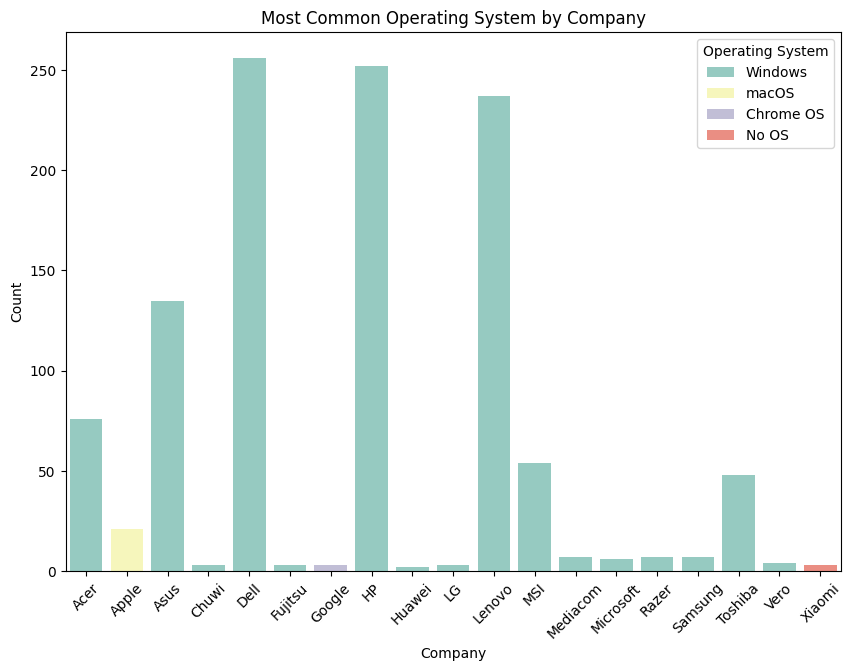

In [97]:
os_counts_per_company = laptop_prices_fixed.groupby(['Company', 'OpSys']).size().reset_index(name='Count')
most_common_os_per_company = os_counts_per_company.loc[os_counts_per_company.groupby('Company')['Count'].idxmax()]

plt.figure(figsize=(10, 7))
sns.barplot(data=most_common_os_per_company, x='Company', y='Count', hue='OpSys', palette='Set3')
plt.title("Most Common Operating System by Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.yticks()
plt.legend(title="Operating System")
plt.show()

In 16 out of 19 companies, the most common operating system in Windows.\
We can clearly infer from this analysis, that Windows is most common in our dataset as well as within most companies.